In [1]:
import os
import numpy as np
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\annotations'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '5x')
nm = 'CODA_python_08_26_2024'

WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[0, 255, 0],
                  [23, 80, 150],
                  [150, 31, 23],
                  [199, 196, 147],
                  [23, 80, 151],
                  [255, 255, 255],
                  [242, 167, 227]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...
Plotting cmap took 0.0 minutes and 0.03126072883605957 seconds
Saving metadata took 0.0 minutes and 0.0936732292175293 seconds


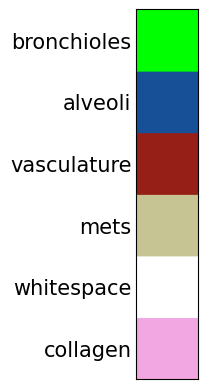

In [2]:
from save_model_metadata import save_model_metadata
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [ ]:
from WSI2png import WSI2png
resolution = '5x'
WSI2png(pth, resolution, umpix)

In [2]:
from load_annotation_data import load_annotation_data
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 4: 2024-02-26 10.36.39
Checking parameters took 0.0 minutes and 0.0421147346496582 seconds
 annotation data previously loaded
Image 2 of 4: 84 - 2024-02-26 10.33.40
Checking parameters took 0.0 minutes and 0.05058026313781738 seconds
 annotation data previously loaded
Image 3 of 4: TVNTC 1-2 2
Checking parameters took 0.0 minutes and 0.04899954795837402 seconds
 annotation data previously loaded
Image 4 of 4: TVWT 4-1 1
Checking parameters took 0.0 minutes and 0.04164242744445801 seconds
 annotation data previously loaded


In [4]:
from create_training_tiles import create_training_tiles
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 27676600.0 pixels of bronchioles, 7% of the most common class.
 There are 125561600.0 pixels of alveoli, 36% of the most common class.
 There are 19516600.0 pixels of vasculature, 5% of the most common class.
 There are 31546800.0 pixels of mets, 9% of the most common class.
 There are 347889800.0 pixels of whitespace. This is the most common class.
 There are 13714100.0 pixels of collagen, 3% of the most common class.

Building training tiles...
Starting time for the while loop
Total time elapsed for the while loop: 521.873687505722
Saving big tiles
[ 2.  1.  2. 20.  2. 16. 19.  5. 20.  1. 19.  2. 18. 18. 20.  5. 20.  1.
  6. 21. 20. 20.  1. 21.  1.  5.  5. 22. 16. 23.  5. 17.  1. 21. 20.  6.
 20.  2.  1.  1.  6.  5.  1.  2.  5.  5. 23. 20.  5.  1.  5. 20.  6.  5.
 20. 23.  1.  1. 16. 22.  5. 20.  5. 21.  1. 18.  5. 20.  1. 20. 16. 20.
 19. 18.  2.  5.  2.  5.  5.  2. 20. 21. 21.  1.  2. 20. 19. 21.  1. 18.
 20.

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Reloading Tuner from keras_tuner_dir\deeplabv3plus_tuning\tuner0.json


INFO:train_segmentation_model:Best hyperparameters found:
INFO:train_segmentation_model:Learning rate: 0.0003753825454413402


Epoch 1/8
500/500 [==============================] - 174s 325ms/step - loss: 0.0468 - accuracy: 0.9805 - val_loss: 0.0523 - val_accuracy: 0.9791
Epoch 2/8
500/500 [==============================] - 155s 308ms/step - loss: 0.0453 - accuracy: 0.9810 - val_loss: 0.0521 - val_accuracy: 0.9794
Epoch 3/8
500/500 [==============================] - 154s 308ms/step - loss: 0.0439 - accuracy: 0.9815 - val_loss: 0.0512 - val_accuracy: 0.9799
Epoch 4/8
500/500 [==============================] - 154s 307ms/step - loss: 0.0426 - accuracy: 0.9821 - val_loss: 0.0508 - val_accuracy: 0.9801
Epoch 5/8
500/500 [==============================] - 155s 311ms/step - loss: 0.0417 - accuracy: 0.9824 - val_loss: 0.0511 - val_accuracy: 0.9802
Epoch 6/8
500/500 [==============================] - 157s 313ms/step - loss: 0.0410 - accuracy: 0.9826 - val_loss: 0.0510 - val_accuracy: 0.9804
Epoch 7/8
500/500 [==============================] - 159s 319ms/step - loss: 0.0404 - accuracy: 0.9829 - val_loss: 0.0511 - val_ac

UnboundLocalError: local variable 'start' referenced before assignment

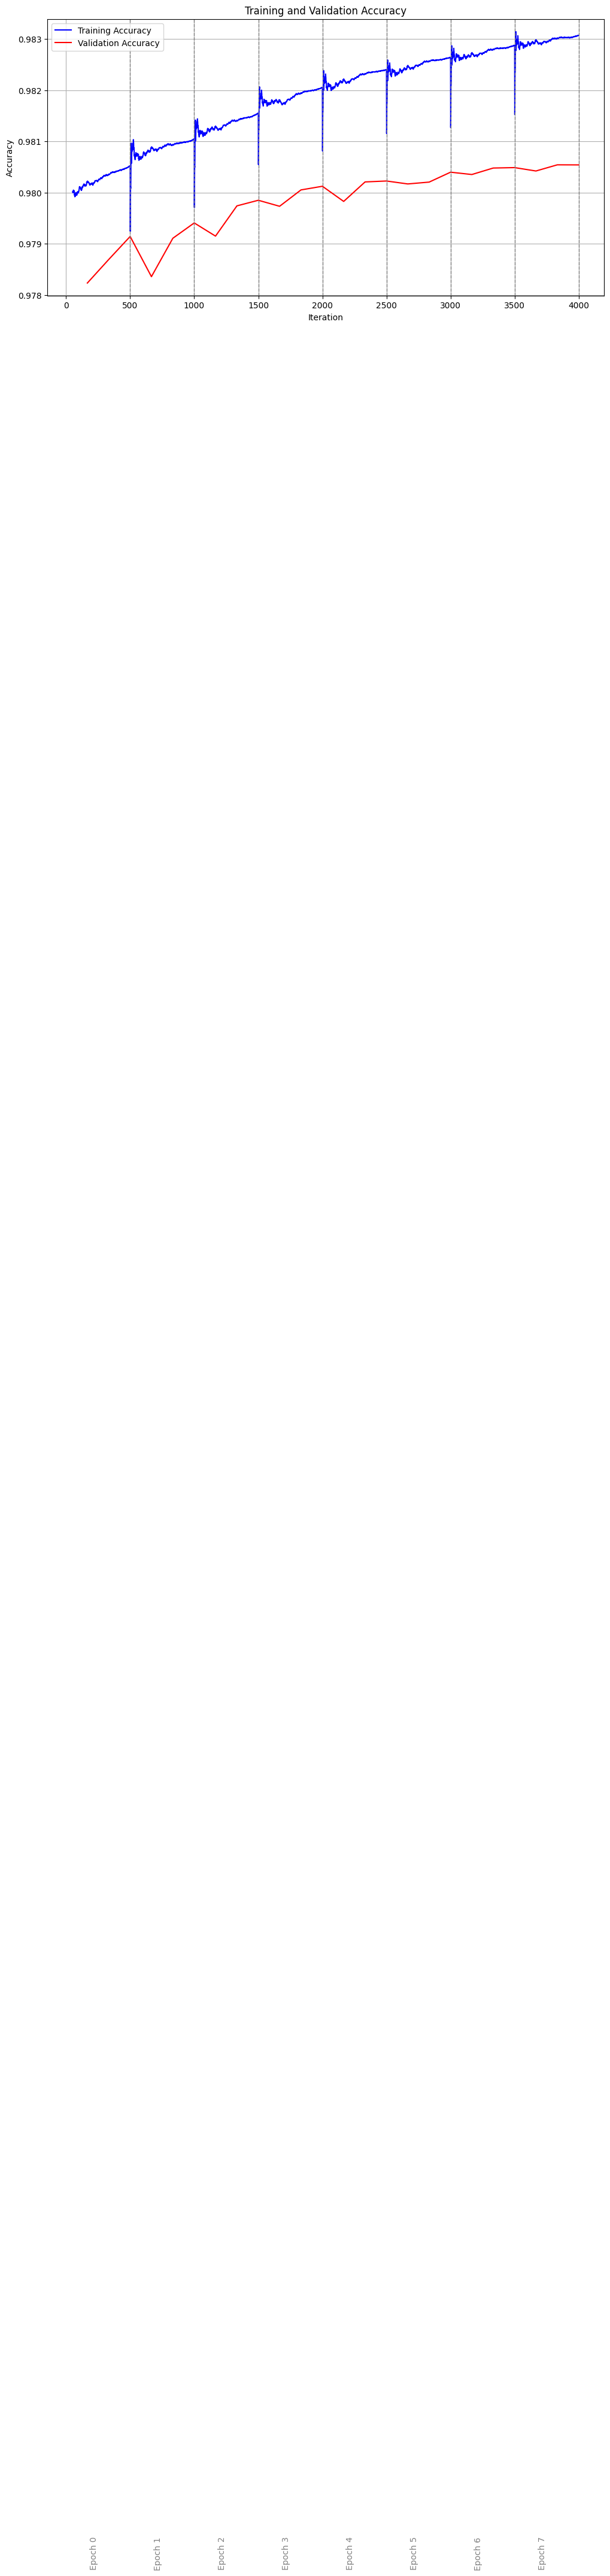

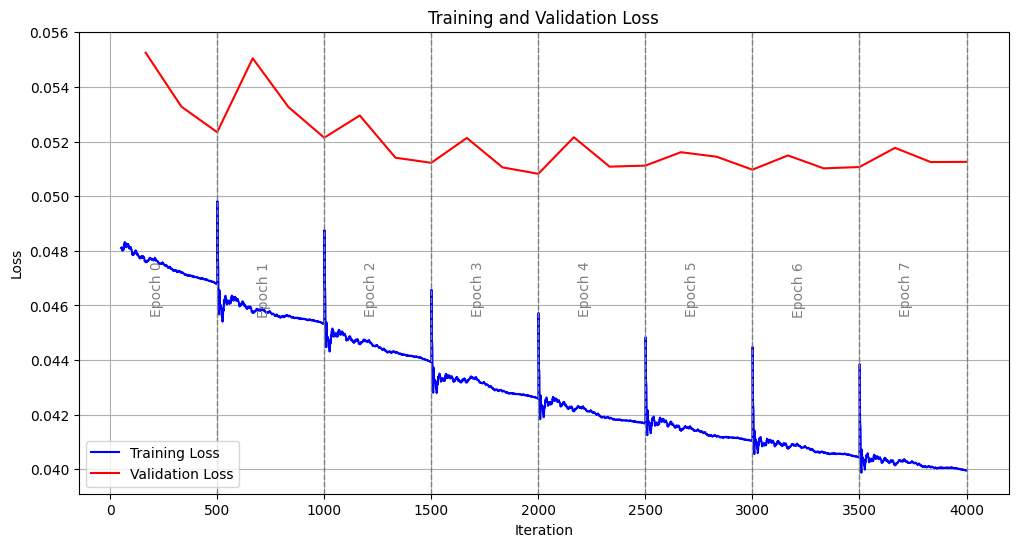

In [2]:
from train_segmentation_model import train_segmentation_model
train_segmentation_model(pthDL, fine_tune=True) 

Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: TVWT 2-2 2
Checking parameters took 0.0 minutes and 0.0 seconds
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.5229897499084473 seconds
 Creating file...
Import xml took 0.0 minutes and 0.5547976493835449 seconds
  Existing TA loaded
Calculating tissue mask took 0.0 minutes and 1.4377357959747314 seconds
 2. of 4. Interpolating annotated regions and saving mask image
Format white took 0.0 minutes and 2.511155128479004 seconds
Saving annotation mask took 0.0 minutes and 7.863543748855591 seconds
 4. of 4. Creating bounding box tiles of all annotations
Bounding boxes took 0.0 minutes and 1.7079885005950928 seconds
 Finished image in 14 seconds.
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
1/1 [==============================] - 0s 27ms/step
Image 1 of 1 took 10 s
  Total time for classification: 0.0h 0.0m 17.886581659317017s


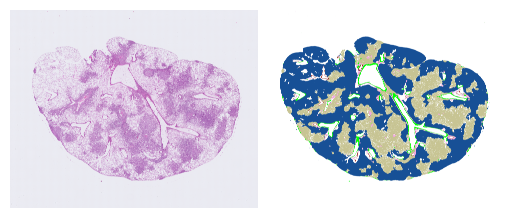


Calculating total number of pixels in the testing dataset...
  There are 43345 pixels of bronchioles, 21% of the most common class.
  There are 115507 pixels of alveoli, 56% of the most common class.
  There are 31717 pixels of vasculature, 15% of the most common class.
  There are 124013 pixels of mets, 60% of the most common class.
  There are 204281 pixels of whitespace. This is the most common class.
  There are 11112 pixels of collagen, 5% of the most common class.

  Only 11112 testing pixels of collagen found.
    We suggest a minimum of 15,000 pixels for a good assessment of model accuracy.
    Confusion matrix may be misleading.


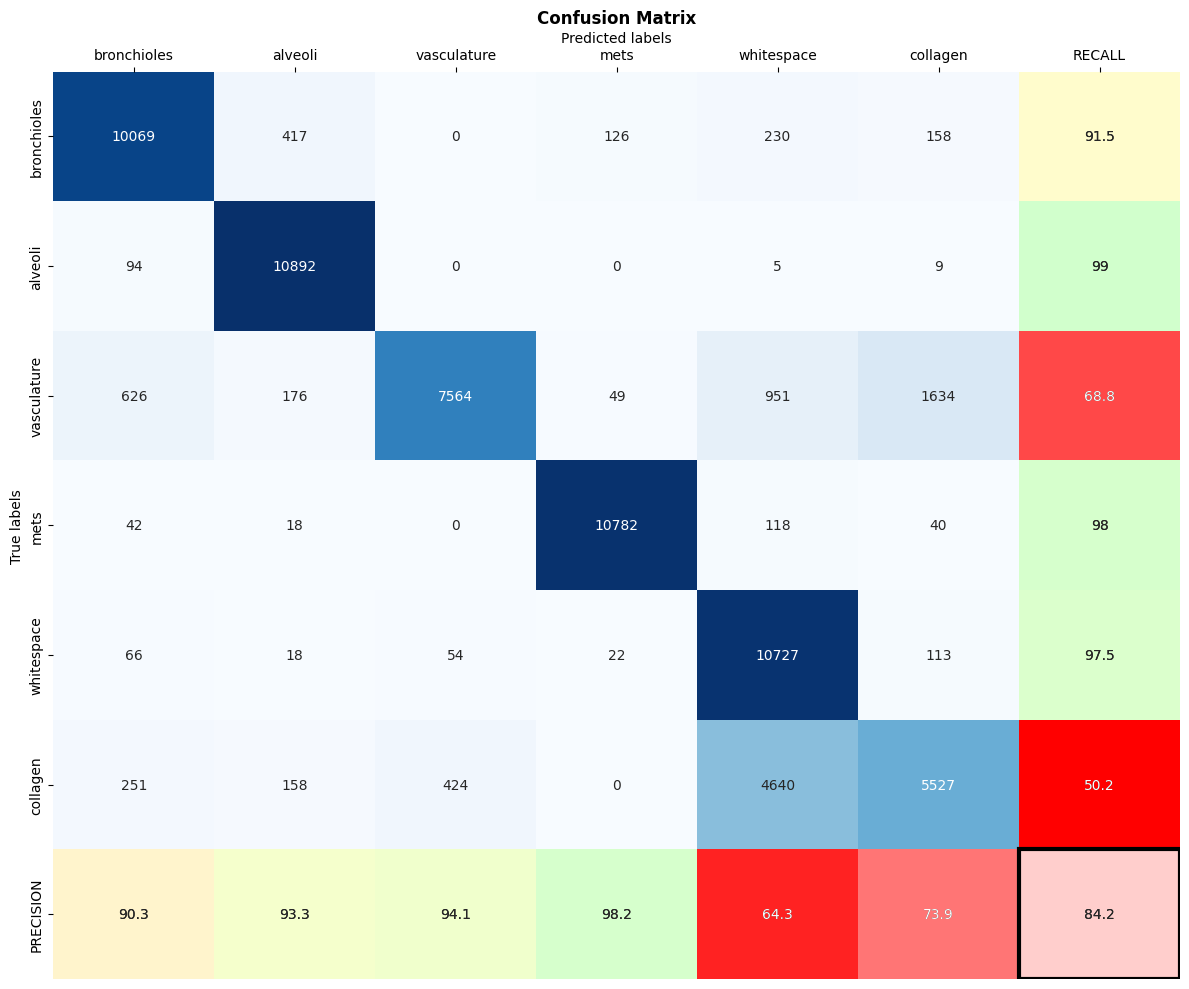


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\annotations\CODA_python_08_26_2024\confusion_matrix.jpg

Overall Accuracy: 84.2%


In [3]:
from test_segmentation_model import test_segmentation_model
test_segmentation_model(pthDL,pthtest, pthtestim)

   
  Starting classification of image 1 of 4: 2024-02-26 10.36.39.tif
1/1 [==============================] - 0s 16ms/step
Image 1 of 4 took 12 s
  Starting classification of image 2 of 4: 84 - 2024-02-26 10.33.40.tif
1/1 [==============================] - 0s 16ms/step
Image 2 of 4 took 36 s
  Starting classification of image 3 of 4: TVNTC 1-2 2.tif
1/1 [==============================] - 0s 16ms/step
Image 3 of 4 took 56 s
  Starting classification of image 4 of 4: TVWT 4-1 1.tif
1/1 [==============================] - 0s 13ms/step
Image 4 of 4 took 78 s
  Total time for classification: 0.0h 1.0m 29.96233558654785s


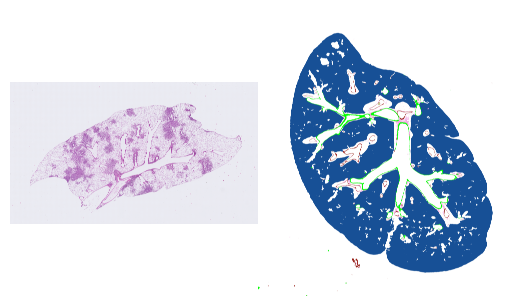

'\\\\10.99.68.52\\Kiemendata\\Valentina Matos\\tissues for methods paper\\mouse lung\\annotations\\5x\\classification_CODA_python_08_26_2024'

In [4]:
from classify_images import classify_images
classify_images(pthim,pthDL)